In [14]:
import pandas as pd
import numpy as np

# LOADING DATA


In [53]:
nyc_airbnb = pd.read_csv('../AB_NYC_2019.csv')

In [16]:
#Let's verify the usability of the dataframe

In [17]:
nyc_airbnb.shape
#We have enough values in this dataset to perform ML

(48895, 16)

In [18]:
nyc_airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
id                                48895 non-null int64
name                              48879 non-null object
host_id                           48895 non-null int64
host_name                         48874 non-null object
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
last_review                       38843 non-null object
reviews_per_month                 38843 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-null int64

In [19]:
#Let's check the type of each column
nyc_airbnb.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [20]:
nyc_airbnb.head()

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

In [30]:
#Convert the last review column
nyc_airbnb['last_review'] = pd.to_datetime(nyc_airbnb['last_review'],infer_datetime_format=True)

In [22]:
nyc_airbnb.dtypes

id                                         int64
name                                      object
host_id                                    int64
host_name                                 object
neighbourhood_group                       object
neighbourhood                             object
latitude                                 float64
longitude                                float64
room_type                                 object
price                                      int64
minimum_nights                             int64
number_of_reviews                          int64
last_review                       datetime64[ns]
reviews_per_month                        float64
calculated_host_listings_count             int64
availability_365                           int64
dtype: object

# PREPROCESSING DATA

In [10]:
#MISSING VALUE

In [23]:
#Let's check the missing values  
nyc_airbnb.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [54]:
#First, we drop non relevant features: host_id, host_name
nyc_airbnb.drop(['host_id', 'host_name'], axis=1, inplace=True)

In [25]:
#NaN values in the last_review and reviews_per_month columns appear when no review were given.
#For reviews_per_month, I will fill those values with 0's.

In [55]:
#We decide to drop all the missing values (all are from 'reviews per month' feature) as it doesn't have an impact on our study
nyc_airbnb.dropna(how="any", inplace=True)

In [78]:
#Now, check the changes in the Dataframe to verify our cleaning 
nyc_airbnb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38843 entries, 0 to 48852
Data columns (total 12 columns):
host_id                           38843 non-null int64
neighbourhood_group               38843 non-null object
neighbourhood                     38843 non-null object
latitude                          38843 non-null float64
longitude                         38843 non-null float64
room_type                         38843 non-null object
price                             38843 non-null int64
minimum_nights                    38843 non-null int64
number_of_reviews                 38843 non-null int64
reviews_per_month                 38843 non-null float64
calculated_host_listings_count    38843 non-null int64
availability_365                  38843 non-null int64
dtypes: float64(3), int64(6), object(3)
memory usage: 3.9+ MB


In [56]:
nyc2 = nyc_airbnb.copy()
nyc2

id                                               name  \
0          2539                 Clean & quiet apt home by the park   
1          2595                              Skylit Midtown Castle   
3          3831                    Cozy Entire Floor of Brownstone   
4          5022   Entire Apt: Spacious Studio/Loft by central park   
5          5099          Large Cozy 1 BR Apartment In Midtown East   
6          5121                                    BlissArtsSpace!   
7          5178                   Large Furnished Room Near B'way    
8          5203                 Cozy Clean Guest Room - Family Apt   
9          5238                 Cute & Cozy Lower East Side 1 bdrm   
10         5295                   Beautiful 1br on Upper West Side   
11         5441                    Central Manhattan/near Broadway   
12         5803     Lovely Room 1, Garden, Best Area, Legal rental   
13         6021   Wonderful Guest Bedroom in Manhattan for SINGLES   
14         6090                      West Village Nest - Superhost   
15         6848                   Only 2 stops to Manhattan studio   
16         7097                  Perfect for Your Parents + Garden   
17         7322                                    Chelsea Perfect   
18         7726    Hip Historic Brownstone Apartment with Backyard   
20         7801                   Sweet and Spacious Brooklyn Loft   
21         8024                     CBG CtyBGd HelpsHaiti rm#1:1-4   
22         8025                           CBG Helps Haiti Room#2.5   
23         8110                              CBG Helps Haiti Rm #2   
24         8490             MAISON DES SIRENES1,bohemian apartment   
25         8505                 Sunny Bedroom Across Prospect Park   
27         9357                               Midtown Pied-a-terre   
28         9518       SPACIOUS, LOVELY FURNISHED MANHATTAN BEDROOM   
29         9657                   Modern 1 BR / NYC / EAST VILLAGE   
30         9668                              front room/double bed   
31         9704                Spacious 1 bedroom in luxe building   
32         9782                  Loft in Williamsburg Area w/ Roof   
...         ...                                                ...   
48387  36233091                                 1 room in bushwick   
48391  36235150    Sky View beautiful apt in Williamsburg New York   
48392  36235154                                   Top on Manhattan   
48394  36236013    READY BED GO the goal is to make u feel at home   
48401  36237529            Beautiful Cozy Room, 20mn to FREE ferry   
48404  36238485  Chic Room in Williamsburg + Backyard +Washer D...   
48409  36241283               Enjoy your friendly stay at my place   
48410  36241782  Classic Brooklyn Loft (East Williamsburg/Bushw...   
48413  36242888                 Upper East Site Luxury 2 Bed rooms   
48453  36272851    Private Bedroom in a Prewar Gramercy Building!*   
48454  36273046                  Elegant Spacious UES private room   
48457  36274037                            Cozy Wall Street Studio   
48486  36280646                       Cable and wfi, L/G included.   
48524  36308600          Cozy and Beautiful Park Slope One Bedroom   
48526  36309284  Private Room Near JFK, St John's Hospital, & B...   
48532  36310268                                     Full size room   
48534  36310855  Room 3: Cozy Room w Large Closet & Light Break...   
48576  36318560    Luxury Sun-filled Private Room near Time Square   
48601  36335990                Sunny Studio steps from Wall Street   
48615  36344079                       The Little Castle in Astoria   
48634  36351128   One bedroom without roomies, close to everything   
48636  36351543              2-MONTH SUBLEASE (WITH EARLY MOVE-IN)   
48701  36390226             Comfortable clean Bedstuy private room   
48732  36411407               Brand new 1 bedroom steps from Soho!   
48740  36413632         Spacious 2BR in Beautiful Brooklyn Heights   
48782  36425863        

In [94]:
#We can see that we have 3 categorial features: neighbourhood_group, neighbourhood, room_type
#Let's deeper examine these 3 features and convert them into numerical variables

In [35]:
nyc_airbnb['neighbourhood_group'].value_counts()


Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

In [57]:
nyc_airbnb_neighbourhood_group = pd.get_dummies(nyc_airbnb['neighbourhood_group'])

In [37]:
nyc_airbnb['neighbourhood'].value_counts()

Williamsburg                  3920
Bedford-Stuyvesant            3714
Harlem                        2658
Bushwick                      2465
Upper West Side               1971
Hell's Kitchen                1958
East Village                  1853
Upper East Side               1798
Crown Heights                 1564
Midtown                       1545
East Harlem                   1117
Greenpoint                    1115
Chelsea                       1113
Lower East Side                911
Astoria                        900
Washington Heights             899
West Village                   768
Financial District             744
Flatbush                       621
Clinton Hill                   572
Long Island City               537
Prospect-Lefferts Gardens      535
Park Slope                     506
East Flatbush                  500
Fort Greene                    489
Murray Hill                    485
Kips Bay                       470
Flushing                       426
Ridgewood           

In [38]:
#The neighbourhood columns contains 218 values and we decide to group the values < 1000 in only one column called Others

In [58]:
others_list = nyc_airbnb['neighbourhood'].value_counts()[nyc_airbnb['neighbourhood'].value_counts() < 1000].index
nyc_airbnb['others_neigbourhood'] = 0

In [60]:
others_list

Index(['Midtown', 'East Harlem', 'Greenpoint', 'Chelsea', 'Lower East Side',
       'Washington Heights', 'Astoria', 'West Village', 'Financial District',
       'Flatbush',
       ...
       'New Dorp Beach', 'Breezy Point', 'Lighthouse Hill',
       'Bay Terrace, Staten Island', 'Silver Lake', 'Olinville', 'Holliswood',
       'Richmondtown', 'Rossville', 'Willowbrook'],
      dtype='object', length=209)

In [40]:
others_list = list(others_list)

In [41]:
nyc_airbnb.neighbourhood#.isin(others_list)

0                Kensington
1                   Midtown
2                    Harlem
3              Clinton Hill
4               East Harlem
5               Murray Hill
6        Bedford-Stuyvesant
7            Hell's Kitchen
8           Upper West Side
9                 Chinatown
10          Upper West Side
11           Hell's Kitchen
12              South Slope
13          Upper West Side
14             West Village
15             Williamsburg
16              Fort Greene
17                  Chelsea
18            Crown Heights
19              East Harlem
20             Williamsburg
21               Park Slope
22               Park Slope
23               Park Slope
24       Bedford-Stuyvesant
25          Windsor Terrace
26                   Inwood
27           Hell's Kitchen
28                   Inwood
29             East Village
                ...        
48865                Inwood
48866             Briarwood
48867             Gravesend
48868             Gravesend
48869    Bedford-Stu

In [61]:
nyc_airbnb.others_neigbourhood[nyc_airbnb.neighbourhood.isin(others_list)] = 1 

/Users/floratalavera/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [43]:
nyc_airbnb.others_neigbourhood.value_counts()

0    26791
1    22104
Name: others_neigbourhood, dtype: int64

In [62]:
neighborhood_list = list(nyc_airbnb['neighbourhood'].value_counts()\
                         [nyc_airbnb['neighbourhood'].value_counts() > 1000].index)

In [63]:
for col in neighborhood_list:
    nyc_airbnb[f'{col}'] = 0
    nyc_airbnb[f'{col}'][nyc_airbnb.neighbourhood == col ] = 1 

/Users/floratalavera/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [46]:
#Room type feature
nyc_airbnb['room_type'].value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

In [64]:
nyc_airbnb_room_type = pd.get_dummies(nyc_airbnb['room_type'])
#nyc_airbnb_room_type

In [65]:
nyc_airbnb

id                                               name  \
0          2539                 Clean & quiet apt home by the park   
1          2595                              Skylit Midtown Castle   
3          3831                    Cozy Entire Floor of Brownstone   
4          5022   Entire Apt: Spacious Studio/Loft by central park   
5          5099          Large Cozy 1 BR Apartment In Midtown East   
6          5121                                    BlissArtsSpace!   
7          5178                   Large Furnished Room Near B'way    
8          5203                 Cozy Clean Guest Room - Family Apt   
9          5238                 Cute & Cozy Lower East Side 1 bdrm   
10         5295                   Beautiful 1br on Upper West Side   
11         5441                    Central Manhattan/near Broadway   
12         5803     Lovely Room 1, Garden, Best Area, Legal rental   
13         6021   Wonderful Guest Bedroom in Manhattan for SINGLES   
14         6090                      West Village Nest - Superhost   
15         6848                   Only 2 stops to Manhattan studio   
16         7097                  Perfect for Your Parents + Garden   
17         7322                                    Chelsea Perfect   
18         7726    Hip Historic Brownstone Apartment with Backyard   
20         7801                   Sweet and Spacious Brooklyn Loft   
21         8024                     CBG CtyBGd HelpsHaiti rm#1:1-4   
22         8025                           CBG Helps Haiti Room#2.5   
23         8110                              CBG Helps Haiti Rm #2   
24         8490             MAISON DES SIRENES1,bohemian apartment   
25         8505                 Sunny Bedroom Across Prospect Park   
27         9357                               Midtown Pied-a-terre   
28         9518       SPACIOUS, LOVELY FURNISHED MANHATTAN BEDROOM   
29         9657                   Modern 1 BR / NYC / EAST VILLAGE   
30         9668                              front room/double bed   
31         9704                Spacious 1 bedroom in luxe building   
32         9782                  Loft in Williamsburg Area w/ Roof   
...         ...                                                ...   
48387  36233091                                 1 room in bushwick   
48391  36235150    Sky View beautiful apt in Williamsburg New York   
48392  36235154                                   Top on Manhattan   
48394  36236013    READY BED GO the goal is to make u feel at home   
48401  36237529            Beautiful Cozy Room, 20mn to FREE ferry   
48404  36238485  Chic Room in Williamsburg + Backyard +Washer D...   
48409  36241283               Enjoy your friendly stay at my place   
48410  36241782  Classic Brooklyn Loft (East Williamsburg/Bushw...   
48413  36242888                 Upper East Site Luxury 2 Bed rooms   
48453  36272851    Private Bedroom in a Prewar Gramercy Building!*   
48454  36273046                  Elegant Spacious UES private room   
48457  36274037                            Cozy Wall Street Studio   
48486  36280646                       Cable and wfi, L/G included.   
48524  36308600          Cozy and Beautiful Park Slope One Bedroom   
48526  36309284  Private Room Near JFK, St John's Hospital, & B...   
48532  36310268                                     Full size room   
48534  36310855  Room 3: Cozy Room w Large Closet & Light Break...   
48576  36318560    Luxury Sun-filled Private Room near Time Square   
48601  36335990                Sunny Studio steps from Wall Street   
48615  36344079                       The Little Castle in Astoria   
48634  36351128   One bedroom without roomies, close to everything   
48636  36351543              2-MONTH SUBLEASE (WITH EARLY MOVE-IN)   
48701  36390226             Comfortable clean Bedstuy private room   
48732  36411407               Brand new 1 bedroom steps from Soho!   
48740  36413632         Spacious 2BR in Beautiful Brooklyn Heights   
48782  36425863        

In [66]:
#Concat new columns to original dataframe  
nyc_airbnb_complete = pd.concat([nyc_airbnb, nyc_airbnb_neighbourhood_group, nyc_airbnb_room_type], axis=1)
nyc_airbnb_complete.drop(['neighbourhood_group','neighbourhood','room_type'], axis=1, inplace=True)
nyc_airbnb_complete.columns

Index(['id', 'name', 'latitude', 'longitude', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'others_neigbourhood', 'Williamsburg', 'Bedford-Stuyvesant', 'Harlem',
       'Bushwick', 'Hell's Kitchen', 'East Village', 'Upper West Side',
       'Upper East Side', 'Crown Heights', 'Bronx', 'Brooklyn', 'Manhattan',
       'Queens', 'Staten Island', 'Entire home/apt', 'Private room',
       'Shared room'],
      dtype='object')

In [68]:
nyc_airbnb_complete.head()

id                                              name  latitude  \
0  2539                Clean & quiet apt home by the park  40.64749   
1  2595                             Skylit Midtown Castle  40.75362   
3  3831                   Cozy Entire Floor of Brownstone  40.68514   
4  5022  Entire Apt: Spacious Studio/Loft by central park  40.79851   
5  5099         Large Cozy 1 BR Apartment In Midtown East  40.74767   

   longitude  price  minimum_nights  number_of_reviews last_review  \
0  -73.97237    149               1                  9  2018-10-19   
1  -73.98377    225               1                 45  2019-05-21   
3  -73.95976     89               1                270  2019-07-05   
4  -73.94399     80              10                  9  2018-11-19   
5  -73.97500    200               3                 74  2019-06-22   

   reviews_per_month  calculated_host_listings_count  ...  Upper East Side  \
0               0.21                               6  ...                0   
1               0.38                               2  ...                0   
3               4.64                               1  ...                0   
4               0.10                               1  ...                0   
5               0.59                               1  ...                0   

   Crown Heights  Bronx  Brooklyn  Manhattan  Queens  Staten Island  \
0              0      0         1          0       0              0   
1              0      0         0          1       0              0   
3              0      0         1          0       0              0   
4              0      0         0          1       0              0   
5              0      0         0          1       0              0   

   Entire home/apt  Private room  Shared room  
0                0             1            0  
1                1             0            0  
3                1             0            0  
4                1             0            0  
5                1             0            0  

[5 rows x 29 columns]

In [28]:
#Lets drop the categorial columns


In [29]:
!pip install pandas-profiling

In [60]:
#Check the correlation between continuous variables
correlation = nyc_airbnb_complete.corr()
correlation

host_id  latitude  longitude     price  \
host_id                         1.000000  0.012946   0.141095  0.006269   
latitude                        0.012946  1.000000   0.088152  0.031318   
longitude                       0.141095  0.088152   1.000000 -0.155361   
price                           0.006269  0.031318  -0.155361  1.000000   
minimum_nights                 -0.051693  0.024808  -0.055418  0.025506   
number_of_reviews              -0.141819 -0.008746   0.054681 -0.035938   
reviews_per_month               0.296417 -0.010142   0.145948 -0.030608   
calculated_host_listings_count  0.149412  0.004326  -0.093325  0.052903   
availability_365                0.155082 -0.022228   0.102540  0.078234   
others_neigbourhood             0.084768 -0.080640   0.045492  0.029299   
Williamsburg                   -0.078972 -0.084672  -0.004510 -0.003788   
Bedford-Stuyvesant             -0.010470 -0.221468   0.072972 -0.054759   
Harlem                         -0.025619  0.391524   0.016643 -0.031428   
Bushwick                       -0.010240 -0.131746   0.152093 -0.066666   
Hell's Kitchen                  0.068346  0.125192  -0.174277  0.045040   
East Village                   -0.048453 -0.005361  -0.139470  0.032934   
Upper West Side                -0.025746  0.219033  -0.095874  0.044795   
Upper East Side                -0.013986  0.156905  -0.014857  0.024577   
Crown Heights                  -0.034036 -0.184797   0.019857 -0.028589   
Bronx                           0.073104  0.331950   0.218670 -0.048408   
Brooklyn                       -0.107800 -0.675384   0.002297 -0.090808   
Manhattan                      -0.011073  0.595454  -0.421673  0.165801   
Queens                          0.137616  0.021631   0.625642 -0.086363   
Staten Island                   0.039455 -0.191957  -0.297136 -0.023998   
Entire home/apt                -0.080854 -0.023112  -0.179600  0.287234   
Private room                    0.059425  0.020048   0.172471 -0.270531   
Shared room                     0.073937  0.010689   0.026166 -0.059933   

                                minimum_nights  number_of_reviews  \
host_id                              -0.051693          -0.141819   
latitude                              0.024808          -0.008746   
longitude                            -0.055418           0.054681   
price                                 0.025506          -0.035938   
minimum_nights                        1.000000          -0.069368   
number_of_reviews                    -0.069368           1.000000   
reviews_per_month                    -0.121702           0.549868   
calculated_host_listings_count        0.073479          -0.059784   
availability_365                      0.101686           0.193557   
others_neigbourhood                  -0.002668          -0.007347   
Williamsburg                         -0.006019          -0.014146   
Bedford-Stuyvesant                   -0.015234           0.035919   
Harlem                               -0.004619           0.026158   
Bushwick                             -0.013349          -0.010881   
Hell's Kitchen                        0.010592           0.014667   
East Village                         -0.004244           0.002828   
Upper West Side                       0.027393          -0.020530   
Upper East Side                       0.030538          -0.027118   
Crown Heights                        -0.006133          -0.001967   
Bronx                                -0.016911           0.009739   
Brooklyn                             -0.026977           0.005101   
Manhattan                             0.056859          -0.035317   
Queens                               -0.034613           0.038031   
Staten Island                        -0.012710           0.013971   
Entire home/apt                       0.073292          -0.016340   
Private room                         -0.069815           0.022322   
Shared room                          -0.012615          -0.020241   


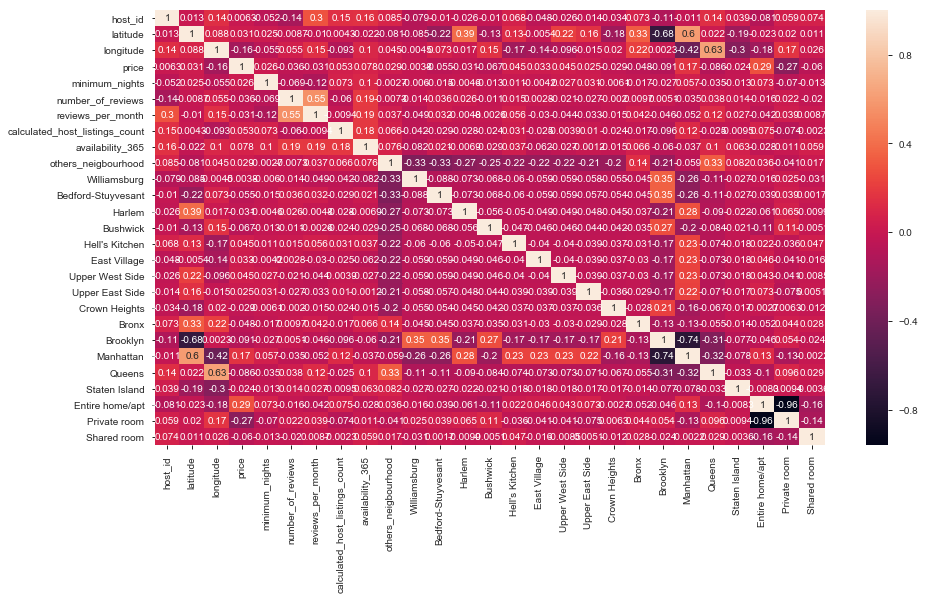

In [61]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns

plt.figure(figsize=(15,8))
sns.heatmap(correlation, annot=True)

In [32]:
#import pandas_profiling

#nyc_airbnb.profile_report(title='Summary')

In [69]:
nyc2 = nyc_airbnb_complete.copy()

In [72]:
nyc2.drop(['name'], axis=1, inplace=True)

In [73]:
nyc2.drop(['last_review', 'reviews_per_month'], axis=1, inplace=True)

In [74]:
nyc2.head()

id  latitude  longitude  price  minimum_nights  number_of_reviews  \
0  2539  40.64749  -73.97237    149               1                  9   
1  2595  40.75362  -73.98377    225               1                 45   
3  3831  40.68514  -73.95976     89               1                270   
4  5022  40.79851  -73.94399     80              10                  9   
5  5099  40.74767  -73.97500    200               3                 74   

   calculated_host_listings_count  availability_365  others_neigbourhood  \
0                               6               365                    1   
1                               2               355                    1   
3                               1               194                    1   
4                               1                 0                    1   
5                               1               129                    1   

   Williamsburg  ...  Upper East Side  Crown Heights  Bronx  Brooklyn  \
0             0  ...                0              0      0         1   
1             0  ...                0              0      0         0   
3             0  ...                0              0      0         1   
4             0  ...                0              0      0         0   
5             0  ...                0              0      0         0   

   Manhattan  Queens  Staten Island  Entire home/apt  Private room  \
0          0       0              0                0             1   
1          1       0              0                1             0   
3          0       0              0                1             0   
4          1       0              0                1             0   
5          1       0              0                1             0   

   Shared room  
0            0  
1            0  
3            0  
4            0  
5            0  

[5 rows x 26 columns]

# SAMPLING

In [76]:
nyc2.drop(['id'], axis=1, inplace=True)

In [77]:
nyc2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38837 entries, 0 to 48852
Data columns (total 25 columns):
latitude                          38837 non-null float64
longitude                         38837 non-null float64
price                             38837 non-null int64
minimum_nights                    38837 non-null int64
number_of_reviews                 38837 non-null int64
calculated_host_listings_count    38837 non-null int64
availability_365                  38837 non-null int64
others_neigbourhood               38837 non-null int64
Williamsburg                      38837 non-null int64
Bedford-Stuyvesant                38837 non-null int64
Harlem                            38837 non-null int64
Bushwick                          38837 non-null int64
Hell's Kitchen                    38837 non-null int64
East Village                      38837 non-null int64
Upper West Side                   38837 non-null int64
Upper East Side                   38837 non-null int64
Crown H

In [78]:
y = nyc2.price
x = nyc2.drop('price', axis = 1)

In [79]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2, random_state=1337)

# ML ALGORITHMS: Linear regression

In [26]:
x_train

NameError: name 'x_train' is not defined

In [81]:
from sklearn.linear_model import LinearRegression

In [82]:
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score
cvscores = cross_val_score(LinearRegression(), x_train, y_train, cv=3, verbose=10, scoring="neg_mean_squared_error")

[CV]  ................................................................
[CV] ....................... , score=-32983.94498428945, total=   0.1s
[CV]  ................................................................
[CV] ...................... , score=-26961.065594003354, total=   0.0s
[CV]  ................................................................
[CV] ....................... , score=-54621.35174850466, total=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s finished


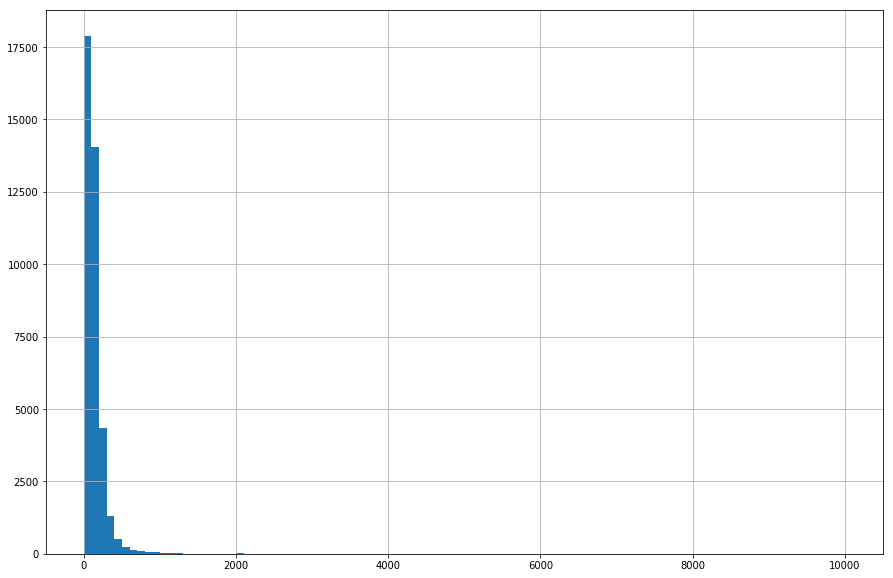

In [89]:
%matplotlib inline
y.hist(bins=100, figsize=(15,10))

In [90]:
y.describe()

count    38837.000000
mean       142.314442
std        196.959053
min          0.000000
25%         69.000000
50%        101.000000
75%        170.000000
max      10000.000000
Name: price, dtype: float64

In [83]:
np.sqrt(-cvscores.mean())

195.41951653370197

In [92]:
from sklearn.ensemble import RandomForestRegressor

cvscores = cross_val_score(RandomForestRegressor(), x_train, y_train, cv=3, verbose=10, scoring="neg_mean_squared_error")
np.sqrt(-cvscores.mean())

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/floratalavera/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV]  ................................................................
[CV] ...................... , score=-35585.376520227874, total=   1.4s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s remaining:    0.0s
/Users/floratalavera/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV] ...................... , score=-33381.394482425654, total=   1.4s
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.8s remaining:    0.0s
/Users/floratalavera/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[CV] ....................... , score=-55055.49728466589, total=   1.4s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    4.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    4.3s finished


203.32426342119905

In [38]:
#The model is not performing well because the R square score is very low, around 0

# ML ALGORITHMS: Decision tree


In [39]:
#Let's try a decision tree 

from sklearn.tree import DecisionTreeRegressor

nyc2_model = DecisionTreeRegressor()
nyc2_model.fit(x_train, y_train)

nyc2_model.score(x_train, y_train)

1.0

In [40]:
#The model overfits because the R square = 1
#Let's test the Decision tree on the test sample

nyc2_model.score(x_test, y_test)

-3.4532319768462907

In [ ]:
#The problem doesnt seem linear so we try the model on categorical variables to validate or not this hypothesis

# ML ALGORITHMS: Linear regression (w categorical variables)


In [63]:
y = nyc_airbnb_complete.price
x = nyc_airbnb_complete.drop('price', axis = 1)
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2, random_state=1337)

In [64]:
nyc_airbnb_complete_model = LinearRegression()
nyc_airbnb_complete_model.fit(x_train, y_train)

nyc_airbnb_complete_model.score(x_train, y_train)

0.10802462097012144

# ML ALGORITHMS: Decision tree (w categorical variables)


In [87]:
from sklearn.ensemble import RandomForestRegressor

nyc_airbnb_complete_model = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=30,
                      max_features='sqrt', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=5,
                      min_weight_fraction_leaf=0.0, n_estimators=1400,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)
nyc_airbnb_complete_model.fit(x_train, y_train)

nyc_airbnb_complete_model.score(x_train, y_train)

0.6747717893948524

In [88]:
nyc_airbnb_complete_model.score(x_test, y_test)

0.3753414159250057

In [47]:
#TEST WITHOUT ATTITUDE & LONGITUDE

In [57]:
#nyc_airbnb_complete = nyc_airbnb_complete.drop(['latitude', 'longitude'], axis=1)


In [86]:
nyc3 = pd.get_dummies(nyc2)
nyc3 = nyc3.drop(['host_id'], axis=1)

y = nyc3.price
x = nyc3.drop('price', axis = 1)
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2, random_state=1337)

# Random Forest

# QUALITY METRICS